In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#read the data
train = pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Inputs/train.csv')
test  = pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Inputs/test.csv').drop('id',axis=1)

print(train.head(5))
print(test.head(5))
train.dtypes

  application_date  segment  branch_id        state  zone  case_count
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0
  application_date  segment
0       2019-07-06        1
1       2019-07-07        1
2       2019-07-08        1
3       2019-07-09        1
4       2019-07-10        1


application_date     object
segment               int64
branch_id           float64
state                object
zone                 object
case_count          float64
dtype: object

In [57]:
train['application_date'] = pd.to_datetime(train['application_date'])
test['application_date'] = pd.to_datetime(test['application_date'])

train['Year'] = train['application_date'].dt.year
train['Month'] = train['application_date'].dt.month
train['Day'] = train['application_date'].dt.day
train['dayofweek'] = train.application_date.dt.day_name()

test['Year'] = test['application_date'].dt.year
test['Month'] = test['application_date'].dt.month
test['Day'] = test['application_date'].dt.day
test['dayofweek'] = test.application_date.dt.day_name()

train.head()


,application_date,segment,branch_id,state,zone,case_count,Year,Month,Day,dayofweek
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,4,1,Saturday
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,4,3,Monday
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,4,4,Tuesday
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2017,4,5,Wednesday
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,2017,4,7,Friday


In [58]:
train['flag']='train'
test['flag']='test'

combo=train.append(test,sort=False)
combo.shape
combo['anchor']='2017-01-01'
combo['anchor'] = pd.to_datetime(combo['anchor'])

combo['days']=(combo['application_date']-combo['anchor']).dt.days

print(combo.head())
combo.application_date.min()

  application_date  segment  branch_id        state  zone  case_count  Year  \
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0  2017   
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0  2017   
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0  2017   
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0  2017   
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0  2017   

   Month  Day  dayofweek   flag     anchor  days  
0      4    1   Saturday  train 2017-01-01    90  
1      4    3     Monday  train 2017-01-01    92  
2      4    4    Tuesday  train 2017-01-01    93  
3      4    5  Wednesday  train 2017-01-01    94  
4      4    7     Friday  train 2017-01-01    96  


Timestamp('2017-04-01 00:00:00')

In [59]:
#list=(['segment','branch_id','Year','Month','Day','dayofweek'])
      
print(list)

combo.dtypes

<class 'list'>


application_date    datetime64[ns]
segment                      int64
branch_id                  float64
state                       object
zone                        object
case_count                 float64
Year                         int64
Month                        int64
Day                          int64
dayofweek                   object
flag                        object
anchor              datetime64[ns]
days                         int64
dtype: object

In [60]:
train=combo[combo['flag']=='train']
test=combo[combo['flag']=='test']

#list=(['segment','branch_id','dayofweek'])
      
print(list)

train.fillna('no_data',inplace=True)
train.segment=train.segment.astype(np.object)

print(train.describe())
print(test.describe())
train.head()

<class 'list'>
         case_count          Year         Month           Day          days
count  80402.000000  80402.000000  80402.000000  80402.000000  80402.000000
mean     185.481841   2017.910512      6.380836     15.846347    509.984565
std      749.602925      0.739391      3.294341      8.765490    237.543362
min        0.000000   2017.000000      1.000000      1.000000     90.000000
25%        0.000000   2017.000000      4.000000      8.000000    306.000000
50%       18.000000   2018.000000      6.000000     16.000000    512.000000
75%       60.000000   2018.000000      9.000000     23.000000    715.000000
max    13787.000000   2019.000000     12.000000     31.000000    933.000000
          segment  branch_id  case_count    Year       Month         Day  \
count  180.000000        0.0         0.0   180.0  180.000000  180.000000   
mean     1.516667        NaN         NaN  2019.0    8.411111   16.238889   
std      0.501116        NaN         NaN     0.0    0.944191    8.725717 

,application_date,segment,branch_id,state,zone,case_count,Year,Month,Day,dayofweek,flag,anchor,days
0,2017-04-01,1,1,WEST BENGAL,EAST,40.0,2017,4,1,Saturday,train,2017-01-01,90
1,2017-04-03,1,1,WEST BENGAL,EAST,5.0,2017,4,3,Monday,train,2017-01-01,92
2,2017-04-04,1,1,WEST BENGAL,EAST,4.0,2017,4,4,Tuesday,train,2017-01-01,93
3,2017-04-05,1,1,WEST BENGAL,EAST,113.0,2017,4,5,Wednesday,train,2017-01-01,94
4,2017-04-07,1,1,WEST BENGAL,EAST,76.0,2017,4,7,Friday,train,2017-01-01,96


In [61]:
train.drop(['flag','anchor','branch_id','state','zone'],axis=1,inplace=True)
test.drop(['flag','anchor','case_count','branch_id','state','zone'],axis=1,inplace=True)


#list=(['segment','branch_id','dayofweek'])

#train.drop(['application_date'],axis=1,inplace=True)
#test.drop(['application_date'],axis=1,inplace=True)

In [62]:
test.head()

,application_date,segment,Year,Month,Day,dayofweek,days
0,2019-07-06,1,2019,7,6,Saturday,916
1,2019-07-07,1,2019,7,7,Sunday,917
2,2019-07-08,1,2019,7,8,Monday,918
3,2019-07-09,1,2019,7,9,Tuesday,919
4,2019-07-10,1,2019,7,10,Wednesday,920


In [63]:
print(train.shape)
train=train.groupby(['segment','Year','Month','Day','dayofweek','days'])['case_count'].sum().reset_index()
print(train.shape)
train.head()

(80402, 8)
(1650, 7)


,segment,Year,Month,Day,dayofweek,days,case_count
0,1,2017,4,1,Saturday,90,299.0
1,1,2017,4,3,Monday,92,42.0
2,1,2017,4,4,Tuesday,93,23.0
3,1,2017,4,5,Wednesday,94,1530.0
4,1,2017,4,7,Friday,96,1341.0


In [64]:
train = pd.get_dummies(train, columns=['dayofweek','segment'],drop_first=True)
test=pd.get_dummies(test, columns=['dayofweek','segment'],drop_first=True)
#train.segment=train.segment.astype(np.object)
print(train.head())
print(train.dtypes)
print(test.dtypes)
print(test.head())

   Year  Month  Day  days  case_count  dayofweek_Monday  dayofweek_Saturday  \
0  2017      4    1    90       299.0                 0                   1   
1  2017      4    3    92        42.0                 1                   0   
2  2017      4    4    93        23.0                 0                   0   
3  2017      4    5    94      1530.0                 0                   0   
4  2017      4    7    96      1341.0                 0                   0   

   dayofweek_Sunday  dayofweek_Thursday  dayofweek_Tuesday  \
0                 0                   0                  0   
1                 0                   0                  0   
2                 0                   0                  1   
3                 0                   0                  0   
4                 0                   0                  0   

   dayofweek_Wednesday  segment_2  
0                    0          0  
1                    0          0  
2                    0          0  
3       

   Year  Month  Day  days  case_count  dayofweek_Monday  dayofweek_Saturday  \
0  2017      4    1    90       299.0                 0                   1   
1  2017      4    3    92        42.0                 1                   0   
2  2017      4    4    93        23.0                 0                   0   
3  2017      4    5    94      1530.0                 0                   0   
4  2017      4    7    96      1341.0                 0                   0   

   dayofweek_Sunday  dayofweek_Thursday  dayofweek_Tuesday  \
0                 0                   0                  0   
1                 0                   0                  0   
2                 0                   0                  1   
3                 0                   0                  0   
4                 0                   0                  0   

   dayofweek_Wednesday  segment_2 year_month  
0                    0          0      20174  
1                    0          0      20174  
2          

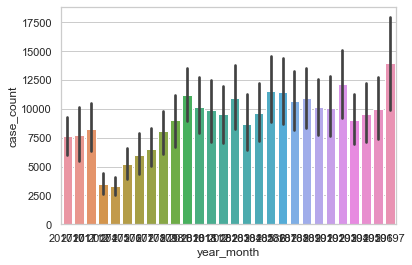

In [65]:
train_chart=train
train_chart['year_month']=train_chart['Year'].astype(str)+train_chart['Month'].astype(str)
print(train_chart.head())
print(train_chart.describe())
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x='year_month', y="case_count", data=train_chart)

In [66]:
train_chart_line=train.groupby(['application_date'])['case_count'].sum().reset_index()
train_chart_line.head()

KeyError: 'application_date'

In [67]:
sns.set(style='darkgrid')
sns.lineplot(x='application_date', y='case_count', data=train_chart_line)
plt.figure(figsize=(8,4))
plt.rcParams["figure.figsize"] = (50, 6)
plt.rcParams["xtick.labelsize"] = 7

NameError: name 'train_chart_line' is not defined

In [71]:
test_id=test

test_id.shape

(180, 11)

In [69]:
test.drop('application_date',axis=1,inplace=True)

In [25]:
def mape(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    error = (predict - actual)/actual
    abs_error = np.absolute(error)
    
    #square_distance = distance ** 2

    #mean_square_distance = square_distance.mean()

    score = np.mean(abs_error)

    return score

from sklearn.metrics import make_scorer
mape_score = make_scorer(mape,greater_is_better = False)

#gsSVR = GridSearchCV(...scoring=rmse_score...)
#gsSVR.fit(X_train,Y_train)
#SVR_best = gsSVR.best_estimator_
#print(gsSVR.best_score_)

In [26]:
#Alternate code for gridsearch/tuning

# A parameter grid for XGBoost
params = {
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.4, 0.8,1],
        'max_depth': [ 5, 8,10],
        'learning_rate':[0.01,0.1,0.3],
        'n_estimators':[30,50,80]
        }



Xd,yd=train.drop('case_count',axis=1),train.case_count
from sklearn.metrics import mean_squared_error
import xgboost as xgb
xg = xgb.XGBRegressor(eval_metric='auc',verbose=100, nthread=4)          

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, random_state=13, shuffle=True)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=xg, param_grid=params, n_jobs=4,scoring=mape_score, cv=skf.split(Xd,yd), verbose=100 )
grid.fit(Xd, yd)
#print('\n All results:')
#print(grid.cv_results_)
#print('\n Best estimator:')
#print(grid.best_estimator_)
#print('\n Best score:')
#print(grid.best_score_ * 2 - 1)
#print('\n Best parameters:')
#print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)
 
results.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Outputs/XGB_tuning_aggregated_v0.3_saved.csv', index=False)
#y_test = grid.best_estimator_.predict_proba(test)
#results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
#results_df.to_csv('submission-grid-search-xgb-porto-01.csv', index=False)

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pick

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    6.5s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  19 tasks      | elapsed:    6.7s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    6.7s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  39 tasks      | elapsed:    7.5s
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    7.5s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

[Parallel(n_jobs=4)]: Done  60 tasks      | elapsed:    8.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  61 tasks      | elapsed:    8.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap


Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done  81 tasks      | elapsed:    9.4s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  82 tasks      | elapsed:    9.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 100 tasks      | elapsed:   10.1s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 101 tasks      | elapsed:   10.1s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 102 tasks      | elapsed:   10.1s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 122 tasks      | elapsed:   10.9s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 123 tasks      | elapsed:   11.0s
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 124 tasks      | elapsed:   11.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 143 tasks      | elapsed:   11.9s
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:   12.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 145 tasks      | elapsed:   12.1s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 163 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done 164 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done 165 tasks      | elapsed:   13.2s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 185 tasks      | elapsed:   14.1s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=obje

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 208 tasks      | elapsed:   15.6s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 209 tasks      | elapsed:   15.6s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 230 tasks      | elapsed:   16.7s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 231 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done 232 tasks      | elapsed:   16.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 249 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done 250 tasks      | elapsed:   17.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 251 tasks      | elapsed:   17.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 252 tasks      | elapsed:  

[Parallel(n_jobs=4)]: Done 271 tasks      | elapsed:   19.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 272 tasks      | elapsed:   19.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 273 tasks      | elapsed:   19.1s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 293 tasks      | elapsed:   20.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 294 tasks      | elapsed:   20.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 315 tasks      | elapsed:   22.1s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 316 tasks      | elapsed:   22.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 317 tasks      | elapsed:   22.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 336 tasks      | elapsed:   24.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 337 tasks      | elapsed:   24.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 338 tasks      | elapsed:   24.1s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   25.2s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 358 tasks      | elapsed:   25.2s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 377 tasks      | elapsed:   26.7s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 378 tasks      | elapsed:   26.7s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 379 tasks      | elapsed:   26.8s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 399 tasks      | elapsed:   28.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 400 tasks      | elapsed:   28.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 419 tasks      | elapsed:   29.4s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=obje

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 439 tasks      | elapsed:   30.4s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 440 tasks      | elapsed:   30.5s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap


Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 460 tasks      | elapsed:   31.9s
[Parallel(n_jobs=4)]: Done 461 tasks      | elapsed:   32.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 481 tasks      | elapsed:   33.6s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 482 tasks      | elapsed:   33.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 483 tasks      | elapsed:   33.9s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 503 tasks      | elapsed:   34.7s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:   34.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 523 tasks      | elapsed:   35.9s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 524 tasks      | elapsed:   35.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 525 tasks      | elapsed:   36.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 546 tasks      | elapsed:   37.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 547 tasks      | elapsed:   37.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 548 tasks      | elapsed:   38.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 566 tasks      | elapsed:   39.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 567 tasks      | elapsed:   39.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 568 tasks      | elapsed:   40.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 586 tasks      | elapsed:   41.2s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 587 tasks      | elapsed:   41.2s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 588 tasks      | elapsed:   41.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 606 tasks      | elapsed:   42.4s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 607 tasks      | elapsed:   42.4s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 608 tasks      | elapsed:   42.6s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 627 tasks      | elapsed:   44.3s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 628 tasks      | elapsed:   44.3s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 629 tasks      | elapsed:   44.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 647 tasks      | elapsed:   46.3s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 648 tasks      | elapsed:   46.3s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 649 tasks      | elapsed:   46.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 667 tasks      | elapsed:   47.4s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 668 tasks      | elapsed:   47.4s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 669 tasks      | elapsed:   47.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 689 tasks      | elapsed:   48.6s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 690 tasks      | elapsed:   48.6s
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 691 tasks      | elapsed:   48.7s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 712 tasks      | elapsed:   50.4s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 713 tasks      | elapsed:   50.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 714 tasks      | elapsed:   50.5s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [29]:
#XGBoost code,using tuned models to predict

X,y=train.drop('case_count',axis=1),train.case_count

from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
xg_reg = xgb.XGBRegressor(eval_metric='mae',learning_rate = 0.1,
                max_depth = 10,colsample_bytree=1, subsample=0.6, n_estimators = 50,verbose=50)

err=[]
y_pred_tot=[]
from sklearn.model_selection import KFold,StratifiedKFold
#fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)

#for train_index, test_index in fold.split(X,y):
#    X_train, X_test = Xd.iloc[train_index], Xd.iloc[test_index]
#    y_train, y_test = yd[train_index], yd[test_index]
print('start')
xg_reg.fit(X,y)
#    print('pred...')
#    p=xg_reg.predict(X_test)
#    print("err: ",100*np.sqrt(mean_squared_error(y_test,p)))
#    err.append(100*np.sqrt(mean_squared_error(y_test,p)))
pred = xg_reg.predict(test)
y_pred_tot.append(pred)

start
[02:00:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [70]:
# y_pred=rf.predict(dftest_dum.drop('id',axis=1))
print(np.mean(err,0))
y_pred=np.mean(y_pred_tot,0)
print(y_pred)

s=pd.DataFrame({'case_count':y_pred})
s.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Outputs/XGB_Aggregated_Tuned(MAPE)_0.4_saved.csv',index=False)
s.head()

nan
[  493.16946   922.5239   1951.0424   1236.9591   1398.5204   1146.6586
  1186.8615    884.17395   994.9442   2032.2095   1441.6489   1533.3823
  1379.3945   1448.5243    983.5311    992.43005  2062.6023   1398.7805
  1543.2563   1393.371    1409.0488   1091.2083    895.1706   1833.3695
  1822.7749   5286.634    1395.6985   1062.7444    931.4177    951.1101
  1751.1096   1335.5176   1402.7985   1284.9678   1400.3104   1135.4304
   919.4193   2290.7153   1532.4636   1621.8418   1272.8203   1353.4248
  1056.6837    927.92957  2237.2437   1353.5175   1479.1985   1367.8851
  1367.4012   1020.808     969.69885  2032.4067   1421.9232   1460.9567
  1481.3188   2017.4086   7789.5225    374.22882  1275.8682   1188.1482
  1117.6135    870.7744   1074.3397    851.56836   688.6576   1773.2054
  1413.9429   1572.4093   1409.562    1425.24     1074.3976    840.75415
  1809.7173   1296.206    1459.4868   1318.2899   1285.8622    899.0741
   926.7855   1806.928    1311.5874   1435.0624   1304.5057

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,case_count
0,493.169464
1,922.523926
2,1951.042358
3,1236.959106
4,1398.520386
